This code is for presenting the gridsearchCV results and to select the hyperparameters. 

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data_types = ['EEG', 'MOTION','EDA', 'PUPIL', 'GAZE']

In [25]:
folder = '(4-2)(v3-param)30_04_2025-04_11_PM'
clfs = {}
for dt in data_types:
    file = glob.glob(f'models/{folder}/*-{dt}-*')[0]
    print(file)
    clf = pickle.load(open(file, 'rb'))
    clfs.update({dt: clf})
clf.keys()

models/(4-2)(v3-param)30_04_2025-04_11_PM/SVM(6)-4-2-EEG-30_04_2025-04_35_PM.pkl
models/(4-2)(v3-param)30_04_2025-04_11_PM/SVM(6)-4-2-MOTION-30_04_2025-04_39_PM.pkl
models/(4-2)(v3-param)30_04_2025-04_11_PM/SVM(6)-4-2-EDA-30_04_2025-04_54_PM.pkl
models/(4-2)(v3-param)30_04_2025-04_11_PM/SVM(6)-4-2-PUPIL-30_04_2025-04_44_PM.pkl
models/(4-2)(v3-param)30_04_2025-04_11_PM/SVM(6)-4-2-GAZE-30_04_2025-04_47_PM.pkl


dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true', 'group'])

In [26]:
for model in clfs['EEG']['estimator']:
    print(model.best_estimator_)

Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=25,
                             score_func=<function mutual_info_classif at 0x7fa3c07b85e0>)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=35)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=35)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=20)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pip

In [27]:
scores = dict()
for key, clf in clfs.items():
    score = pd.DataFrame(
        {
            'test_ROC': clf['test_ROC'],
            'train_ROC': clf['train_ROC'],
            'test_Accuracy': clf['test_Accuracy'],
            'train_Accuracy': clf['train_Accuracy'],
            'test_F1-macro': clf['test_F1-macro'], 
            'train_F1-macro': clf['train_F1-macro']
        }
    )
    scores.update({key: score})
scores['EEG']

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
0,0.543053,0.986322,0.181818,0.909091,0.158926,0.915071
1,0.687445,0.999972,0.333333,0.998873,0.205424,0.998880
2,0.684232,0.993243,0.295455,0.970819,0.261306,0.971377
3,0.625882,0.999766,0.229167,0.995490,0.118619,0.995488
4,0.643078,0.988658,0.145833,0.917700,0.156790,0.921491
5,0.694940,0.982888,0.375000,0.983089,0.314407,0.982968
6,0.689374,0.996981,0.333333,0.969560,0.203810,0.971021
7,0.744433,0.992589,0.333333,0.931229,0.246667,0.935506
8,0.656966,0.982075,0.250000,0.959414,0.219230,0.961298
9,0.597014,0.999107,0.250000,0.986652,0.066667,0.986156


In [28]:
midx = {}
for key, val in scores.items():
    ary = val['test_F1-macro'].values
    idx = np.where(ary == max(ary))[0]
    midx[key] = idx[0]
    print(key, max(ary), idx)
midx

EEG 0.6848933782267116 [19]
MOTION 0.5717032967032968 [15]
EDA 0.2975909039738827 [2]
PUPIL 0.7843308865047995 [16]
GAZE 0.4166666666666666 [17]


{'EEG': 19, 'MOTION': 15, 'EDA': 2, 'PUPIL': 16, 'GAZE': 17}

In [29]:
for key, clf in clfs.items():
    idx = midx[key]
    m = clf['estimator'][idx].best_estimator_
    print(key, m)

EEG Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x7fa3c07b85e0>)),
                ('classify', SVC(C=5, degree=4, gamma=0.1, probability=True))])
MOTION Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=13,
                             score_func=<function mutual_info_classif at 0x7fa3c07b85e0>)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
EDA Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', LinearDiscriminantAnalysis(n_components=2)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
PUPIL Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', NeighborhoodComponentsAnalysis(n_components=3)),
                ('classify',
                 SVC(C=1, degree=2, gamma=0.001, p

IndexError: index 2 is out of bounds for axis 0 with size 2

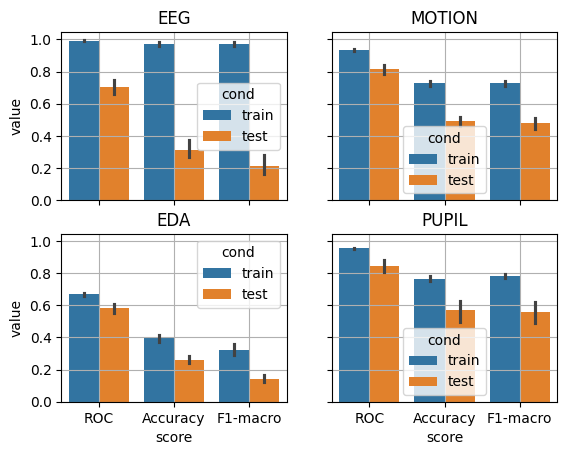

In [30]:
_, ax = plt.subplots(2,2, sharex=True, sharey=True)
r, c = 0,0
for key, score in scores.items():
    x = score.melt()
    x['score'] = [a.split('_')[1] for a in x.variable]
    x['cond'] = [a.split('_')[0] for a in x.variable]
    sns.barplot(data=x, x='score', y='value', hue='cond', ax=ax[r,c], hue_order=['train', 'test'])
    ax[r,c].grid()
    ax[r,c].set_title(key)
    c += 1
    if c == 2:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

In [ ]:
_, ax = plt.subplots(3, 5, figsize=(8, 4), sharex=True, sharey=True)
c = 0
for key, score in scores.items():
    ax[0, c].set_title(key)
    sns.lineplot(score[['train_Accuracy','test_Accuracy']], ax=ax[0, c])
    sns.lineplot(score[['train_F1-macro', 'test_F1-macro']], ax=ax[1, c])
    sns.lineplot(score[['train_ROC', 'test_ROC']], ax=ax[2, c])
    for i in range(3): 
        ax[i, c].legend().remove()
        ax[i, c].grid()
        ax[i, c].set_xticks(range(0, score.shape[0], 5))
    c += 1
    
ax[0, 0].set_ylabel('Accuracy')
ax[1, 0].set_ylabel('F1-macro')
ax[2, 0].set_ylabel('ROC')

plt.tight_layout()
plt.show()